In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

import utils

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
## Paths ======================================
IMAGES_MAT = 'data/images_mat/'
IMAGES_PNG = 'data/images_png/'
LABELS_MAT = 'data/labels_mat/'
LABELS_PNG = 'data/labels_png/'
TRAIN_MAT = 'data/train_mat.txt'
TRAIN_PNG = 'data/train_png.txt'
VAL_MAT = 'data/val_mat.txt'

TRAIN = 'data/train.tfrecords'
VAL = 'data/val.tfrecords'
## ============================================

In [3]:
## write train dataset
with tf.io.TFRecordWriter(TRAIN) as writer:
    ## write .mat files
    with open(TRAIN_MAT) as file:
        filenames = [s.rstrip('\n') for s in file.readlines()]
    for name in filenames:
        image = utils.get_image(IMAGES_MAT+name+'.jpg')
        label = utils.get_label_mat(LABELS_MAT+name+'.mat')
        writer.write(utils.get_example(image, label).SerializeToString())
    ## write .png files
    with open(TRAIN_PNG) as file:
        filenames = [s.rstrip('\n') for s in file.readlines()]
    for name in filenames:
        image = utils.get_image(IMAGES_PNG+name+'.jpg')
        label = utils.get_label_png(LABELS_PNG+name+'.png')
        writer.write(utils.get_example(image, label).SerializeToString())

In [5]:
train = tf.data.TFRecordDataset(TRAIN).map(utils.parse_example)

In [ ]:
train_imgs = [x for x in train]

In [23]:
len(train_imgs)

20

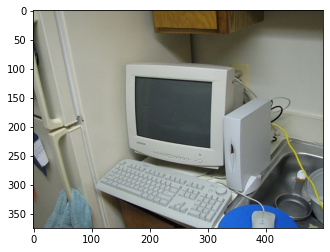

In [28]:
plt.imshow(train_imgs[12][0])

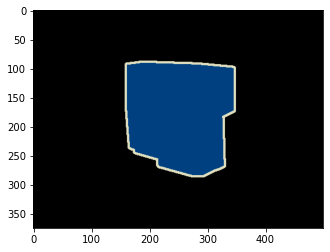

In [29]:
plt.imshow(utils.label_to_image(train_imgs[12][1]))